In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("bitcoin.csv")
data.head()
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   snapped_at    4559 non-null   object 
 1   price         4559 non-null   float64
 2   market_cap    4559 non-null   float64
 3   total_volume  4559 non-null   float64
dtypes: float64(3), object(1)
memory usage: 142.6+ KB


In [6]:
# Średnia i mediana ceny
print("Średnia cena:", data['price'].mean())
print("Mediana ceny:", data['price'].median())

# Najwyższa i najniższa cena
print("Max:", data['price'].max())
print("Min:", data['price'].min())

Średnia cena: 22860.515033252526
Mediana ceny: 8769.01199947348
Max: 124773.50823074432
Min: 67.809


In [5]:
data.columns

Index(['snapped_at', 'price', 'market_cap', 'total_volume'], dtype='object')

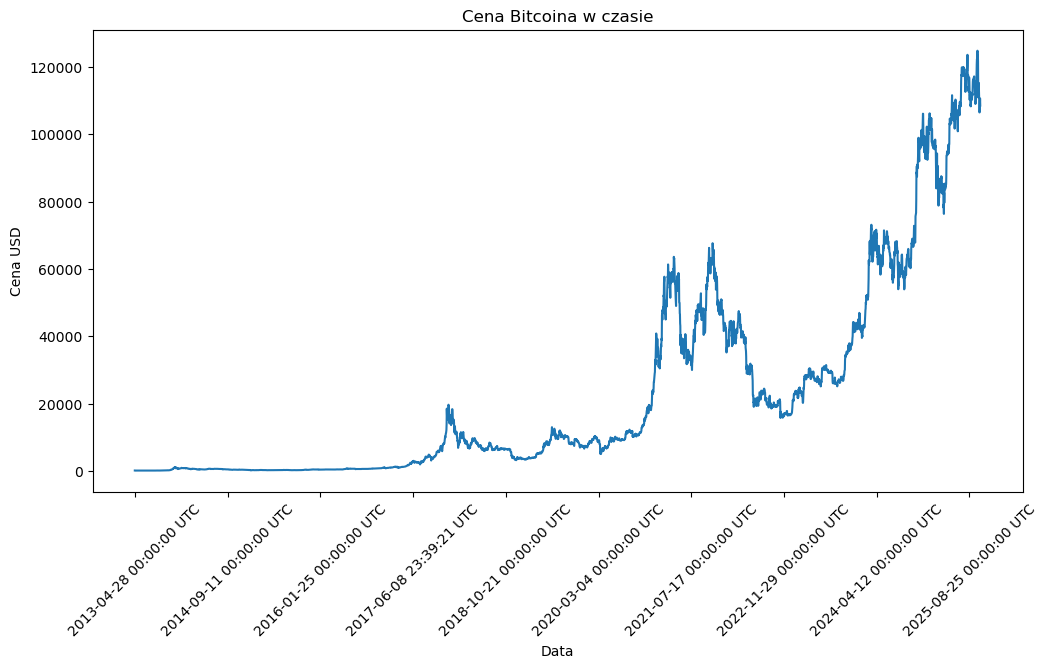

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize=(12,6))
plt.plot(data['snapped_at'], data['price'])
plt.title('Cena Bitcoina w czasie')
plt.xlabel('Data')
plt.ylabel('Cena USD')
plt.xticks(data['snapped_at'][::500], rotation=45)
plt.show()
plt.tight_layout()
#wykres liniowy 

<function matplotlib.pyplot.show(close=None, block=None)>

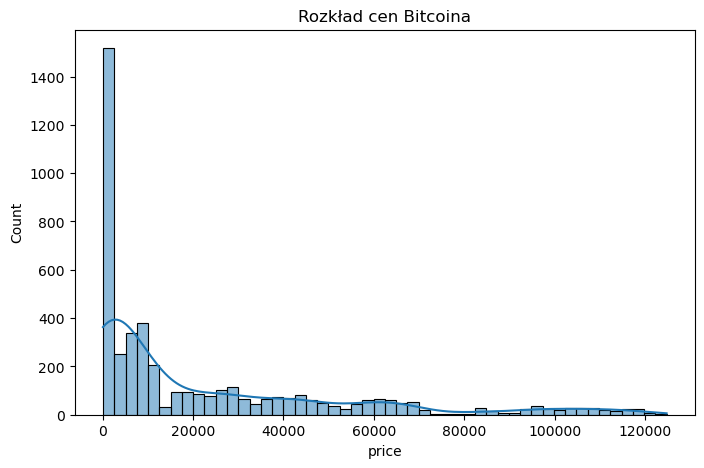

In [17]:
#histogram cen
plt.figure(figsize=(8,5))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Rozkład cen Bitcoina')
plt.show

In [15]:
data.columns

Index(['snapped_at', 'price', 'market_cap', 'total_volume'], dtype='object')

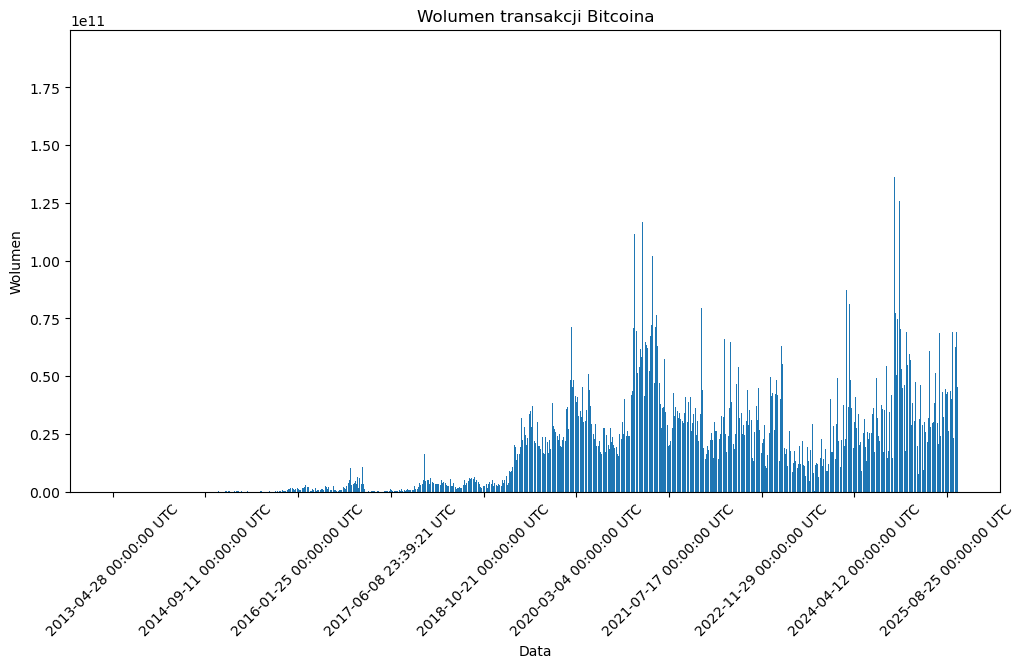

In [28]:
plt.figure(figsize=(12,6))
plt.bar(data['snapped_at'], data['total_volume'])
plt.title('Wolumen transakcji Bitcoina')
plt.xlabel('Data')
plt.ylabel('Wolumen')
plt.xticks(data['snapped_at'][::500], rotation=45)
plt.show()

In [21]:
data.describe()

,price,market_cap,total_volume
count,4559.000000,4.559000e+03,4.559000e+03
mean,22860.515033,4.404408e+11,1.790893e+10
std,29901.206827,5.917139e+11,2.128234e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,649.063350,9.663949e+09,5.069040e+08
50%,8769.011999,1.560473e+11,1.142903e+10
75%,35712.486478,6.783384e+11,2.890428e+10
max,124773.508231,2.486073e+12,1.904603e+11


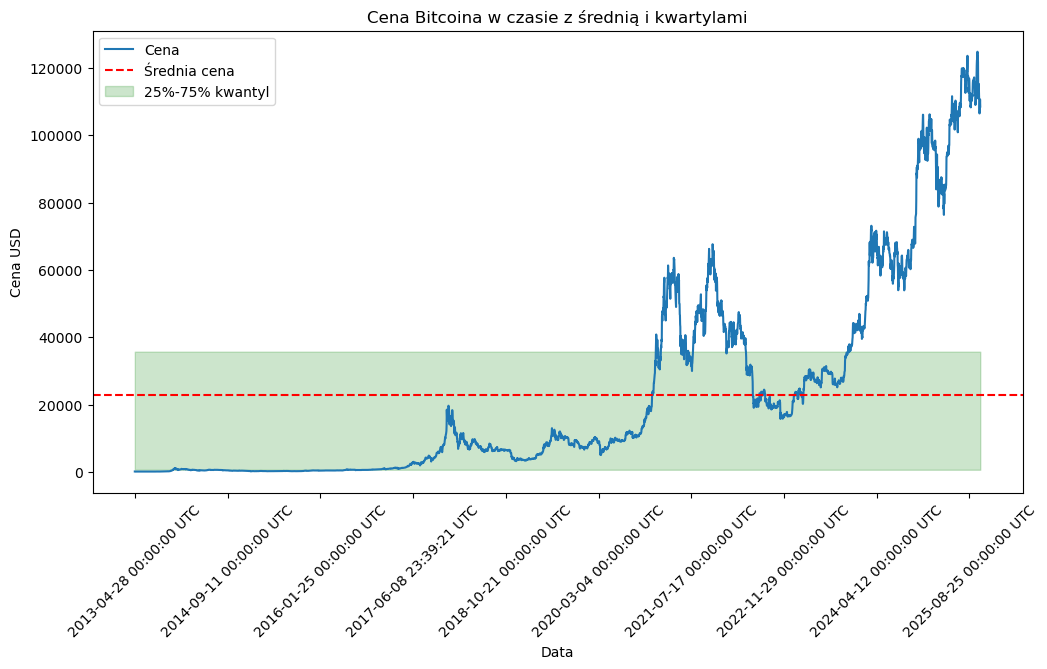

In [27]:
# Obliczamy kwartyle
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
mean_price = data['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(data['snapped_at'], data['price'], label='Cena')
plt.axhline(y=mean_price, color='red', linestyle='--', label='Średnia cena')
plt.fill_between(data['snapped_at'], q1, q3, color='green', alpha=0.2, label='25%-75% kwantyl')
plt.title('Cena Bitcoina w czasie z średnią i kwartylami')
plt.xlabel('Data')
plt.ylabel('Cena USD')
plt.xticks(data['snapped_at'][::500], rotation=45)
plt.legend()
plt.show()

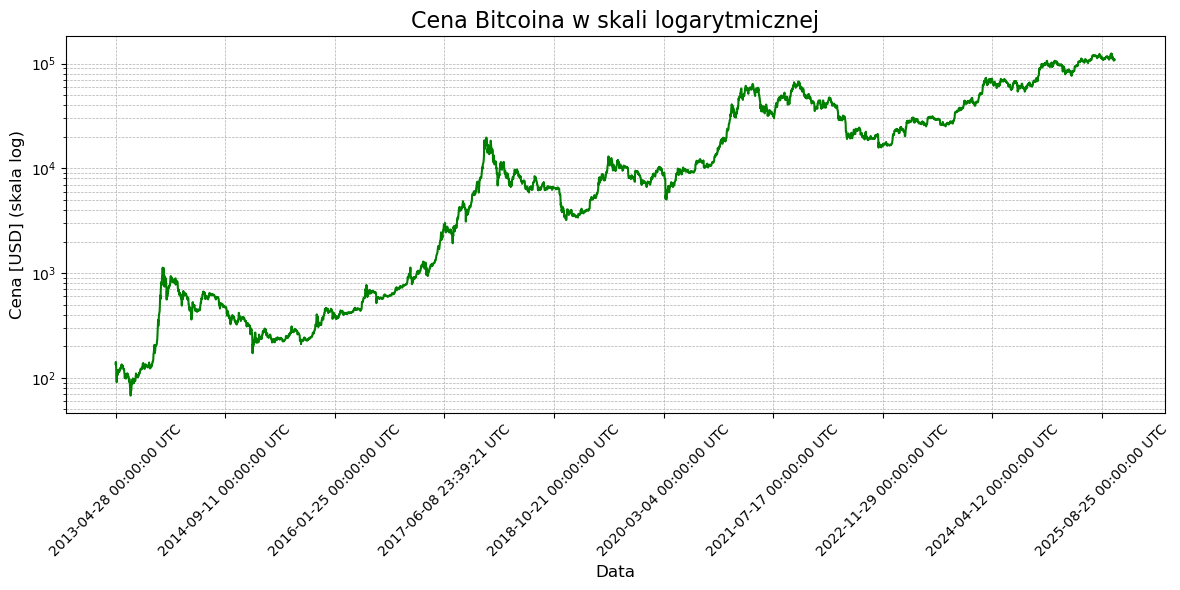

In [38]:
plt.figure(figsize=(12,6))
plt.plot(data['snapped_at'], data['price'], color='green')

plt.yscale('log') # 🔹 Skala logarytmiczna osi Y
plt.title('Cena Bitcoina w skali logarytmicznej', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Cena [USD] (skala log)', fontsize=12)
plt.xticks(data['snapped_at'][::500], rotation=45)
plt.grid(True, which="both", ls="--", linewidth=0.5) # 🔹 siatka pomocnicza
plt.tight_layout()
plt.show()

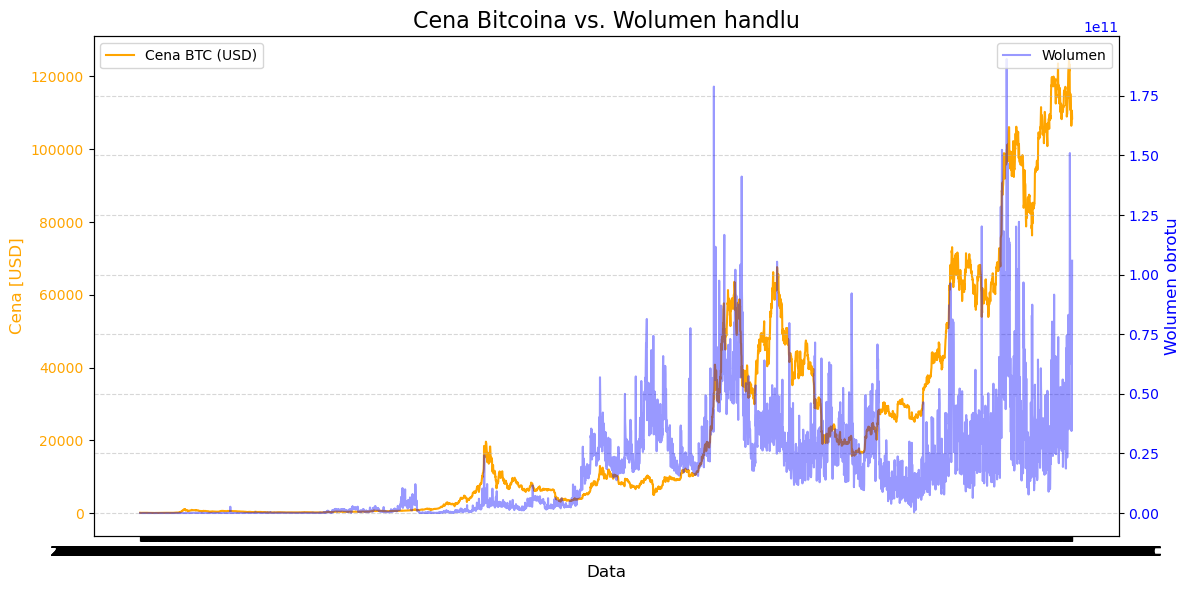

<Figure size 640x480 with 0 Axes>

In [41]:
fig, ax1 = plt.subplots(figsize=(12,6))

# 🔹 Oś 1 — cena BTC
ax1.plot(data['snapped_at'], data['price'], color='orange', label='Cena BTC (USD)')
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Cena [USD]', color='orange', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')

# 🔹 Oś 2 — wolumen (po prawej)
ax2 = ax1.twinx()
ax2.plot(data['snapped_at'], data['total_volume'], color='blue', alpha=0.4, label='Wolumen')
ax2.set_ylabel('Wolumen obrotu', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# 🔹 Tytuł i siatka
plt.title('Cena Bitcoina vs. Wolumen handlu', fontsize=16)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)

# 🔹 Legenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
plt.close('all')
plt.clf()